<a href="https://colab.research.google.com/github/GraziellaRusso/prova/blob/master/DBSCAN_Statistica_Graz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib import cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.stats import norm
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

L = 50                            # Dimensione griglia
centers = [[(L-1)*0.5,(L-1)*0.5]] # Centro del blob
sigma_noise = 2                   # Sigma del rumore
sigma_spatial = 4                 # Sigma della distribuzione spaziale del blob (in pixel)
n_samples =3000                   # Numero di segnali generati
th = 1.5*sigma_noise

**GENERAZIONE GRIGLIA PER 100 EVENTI**

In [0]:
# Eseguire solo una volta, per generare le run

os.system('mkdir -p runs')
os.chdir('runs') 

for run in np.arange(0,500,1):

    # Genero le griglie

    grid = np.zeros((L,L))        # Contiene le "coordinate" di ogni pixel, e il valore del segnale
    background = np.zeros((L,L))  # Griglia background
    signal = np.zeros((L,L))      # Griglia segnale

    # Genero il fondo

    for i in np.arange(0,L,1):

      for j in np.arange(0,L,1):

        r = np.random.normal(0,2)
        background[i][j] = r

    # Genero il blob

    X, blob_labels = make_blobs(n_samples=n_samples, centers=centers, cluster_std=sigma_spatial, random_state=run)

    # Discretizzazione del blob

    for j in np.arange(0,len(X),1):

      x = int(np.round(X[j][0]))
      y = int(np.round(X[j][1]))

      signal[x][y] += 1

    # Somma background+segnale

    for j in np.arange(0,L,1):

      for i in np.arange(0,L,1):

        s = signal[i][j] + background[i][j]

        if s >= th:

          grid[i][j] = np.round(s)

        if signal[i][j] == 0 and background[i][j] >= th: # Contiene solo il rumore "puro", cioè quello che non si somma al segnale

          background[i][j] = np.round(background[i][j])

        else:

          background[i][j] = 0

        if s >= th and signal[i][j] != 0:                # Contiene solo il segnale (a cui ora si è aggiunto il rumore)

          signal[i][j] = np.round(s)

        else:

          signal[i][j] = 0

    # Creazione array coordinate per DBSCAN

    points_list = []
    signal_list = []
    background_list= []
    phot = 0
     
    for i in np.arange(0,L,1):

      for j in np.arange(0,L,1):

        if grid[i][j] != 0:

          points_list.append([j,i,grid[i][j]])

        if signal[i][j] != 0:
          signal_list.append([j,i,signal[i][j]])
          phot += signal[i][j]
     
        if background[i][j] != 0:
          background_list.append([j,i,background[i][j]])

    points = np.array(points_list)
    signal_plot = np.array(signal_list)
    background_plot = np.array(background_list)

    # Esportazione dataframe

    df1 = pd.DataFrame(points, index=None)
    df2 = pd.DataFrame(signal_plot, index=None)

    df1.to_csv('grid_%d.csv' %run,index_label=False)
    df2.to_csv('signal_%d.csv' %run,index_label=False)

    #print('%d Background pixels generated over threshold, %d Signal photons (summed with background) over threshold in %d pixels' %(len(background_plot),phot,len(signal_plot)))

In [0]:
# Eseguire se in runtime locale si ha un set di dati dentro la cartella runs
os.chdir('runs')

**DBSCAN**

Run 0


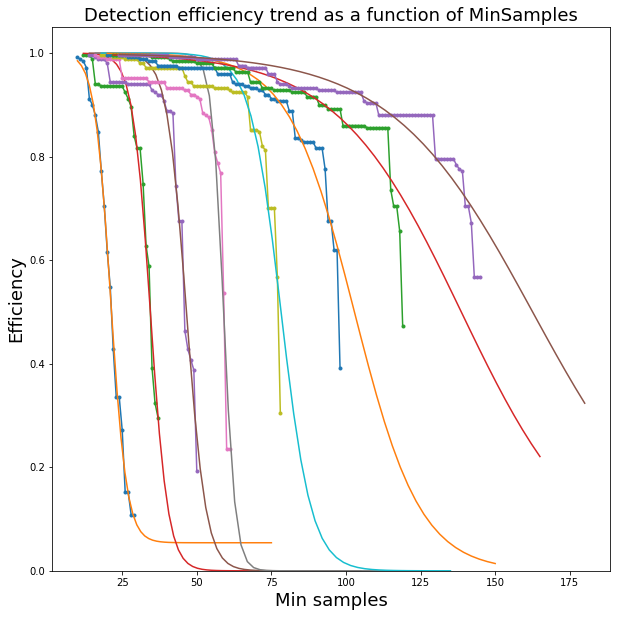

Time elapsed 20.812790 


Run 1
Time elapsed 23.666539 


Run 2
Time elapsed 21.406760 


Run 3
Time elapsed 19.714735 


Run 4
Time elapsed 20.903752 


Run 5
Time elapsed 20.987770 


Run 6
Time elapsed 18.515331 


Run 7
Time elapsed 19.870961 


Run 8
Time elapsed 25.020761 


Run 9
Time elapsed 18.366073 


Run 10
Time elapsed 20.015163 


Run 11
Time elapsed 20.169009 


Run 12
Time elapsed 19.416125 


Run 13
Time elapsed 20.336502 


Run 14
Time elapsed 23.442502 


Run 15
Time elapsed 21.729137 


Run 16
Time elapsed 23.278375 


Run 17
Time elapsed 20.709492 


Run 18
Time elapsed 19.146755 


Run 19
Time elapsed 20.782967 


Run 20
Time elapsed 24.674347 


Run 21
Time elapsed 23.984611 


Run 22
Time elapsed 21.891876 


Run 23
Time elapsed 21.188660 


Run 24
Time elapsed 21.681702 


Run 25
Time elapsed 21.997374 


Run 26
Time elapsed 20.412150 


Run 27
Time elapsed 24.431134 


Run 28
Time elapsed 20.490806 


Run 29
Time elapsed 20.040594 


Run 30
Time elapsed 23.374

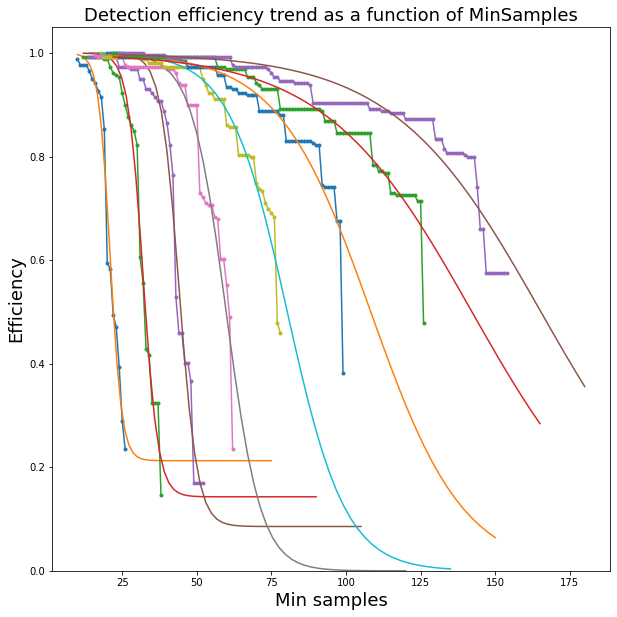

Time elapsed 23.670709 


Run 101
Time elapsed 22.162327 


Run 102
Time elapsed 20.625369 


Run 103
Time elapsed 22.989378 


Run 104
Time elapsed 19.925550 


Run 105
Time elapsed 20.795791 


Run 106
Time elapsed 21.184054 


Run 107
Time elapsed 21.787898 


Run 108
Time elapsed 20.198012 


Run 109
Time elapsed 19.729234 


Run 110
Time elapsed 20.584572 


Run 111
Time elapsed 22.757514 


Run 112
Time elapsed 23.297798 


Run 113
Time elapsed 22.039073 


Run 114
Time elapsed 19.681493 


Run 115
Time elapsed 20.842189 


Run 116
Time elapsed 20.950970 


Run 117
Time elapsed 24.525269 


Run 118
Time elapsed 20.551170 


Run 119
Time elapsed 17.563070 


Run 120
Time elapsed 17.856456 


Run 121
Time elapsed 21.080671 


Run 122
Time elapsed 19.861247 


Run 123
Time elapsed 22.693839 


Run 124
Time elapsed 23.552594 


Run 125
Time elapsed 23.653713 


Run 126
Time elapsed 20.609313 


Run 127
Time elapsed 16.938938 


Run 128
Time elapsed 22.610653 


Run 129
Time elapsed 1

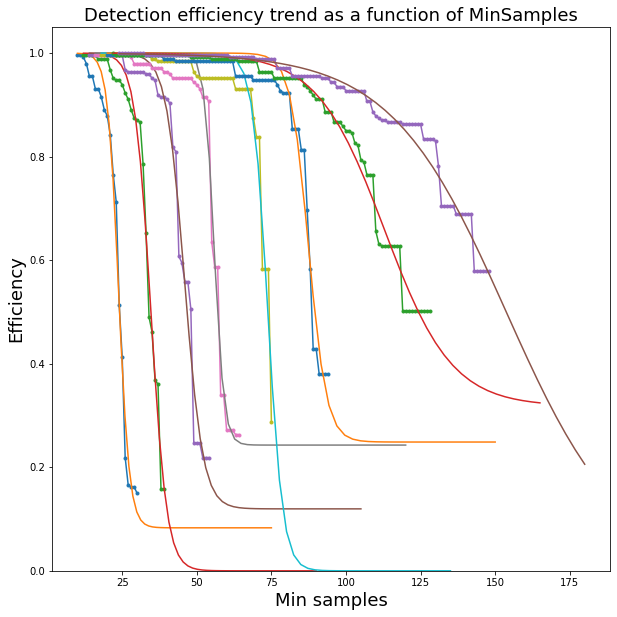

Time elapsed 20.616082 


Run 201
Time elapsed 21.626712 


Run 202
Time elapsed 21.583066 


Run 203
Time elapsed 18.279300 


Run 204
Time elapsed 26.793167 


Run 205
Time elapsed 22.863685 


Run 206
Time elapsed 21.718357 


Run 207
Time elapsed 21.458333 


Run 208
Time elapsed 22.163849 


Run 209
Time elapsed 21.284218 


Run 210
Time elapsed 22.494557 


Run 211
Time elapsed 20.857750 


Run 212
Time elapsed 19.366107 


Run 213
Time elapsed 21.442203 


Run 214
Time elapsed 22.591537 


Run 215
Time elapsed 21.813086 


Run 216
Time elapsed 20.407464 


Run 217
Time elapsed 18.638942 


Run 218
Time elapsed 20.543181 


Run 219
Time elapsed 21.702867 


Run 220
Time elapsed 22.232657 


Run 221
Time elapsed 21.776058 


Run 222
Time elapsed 21.757868 


Run 223
Time elapsed 22.022711 


Run 224
Time elapsed 24.509977 


Run 225
Time elapsed 22.480858 


Run 226
Time elapsed 22.781263 


Run 227
Time elapsed 18.598404 


Run 228
Time elapsed 23.393044 


Run 229
Time elapsed 2

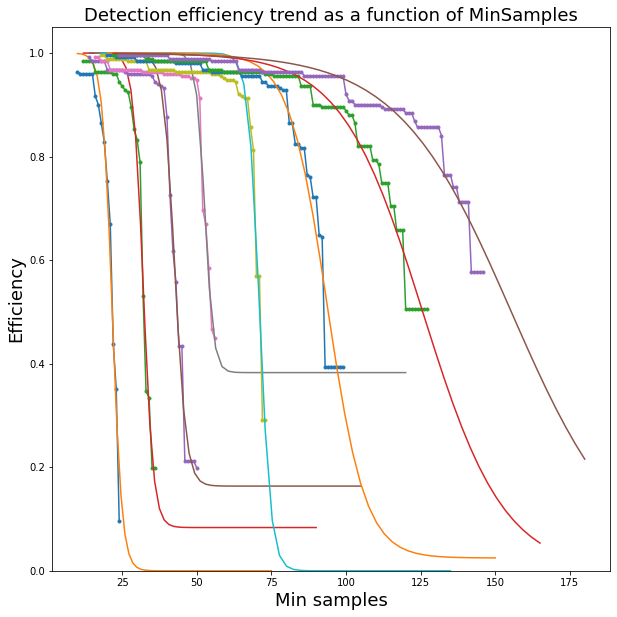

Time elapsed 20.009956 


Run 301
Time elapsed 20.203201 


Run 302
Time elapsed 22.779925 


Run 303
Time elapsed 17.021303 


Run 304
Time elapsed 21.126271 


Run 305
Time elapsed 27.592991 


Run 306
Time elapsed 23.483215 


Run 307
Time elapsed 22.846859 


Run 308
Time elapsed 23.955323 


Run 309
Time elapsed 21.014457 


Run 310
Time elapsed 23.478068 


Run 311
Time elapsed 22.154804 


Run 312
Time elapsed 22.348705 


Run 313
Time elapsed 19.227863 


Run 314
Time elapsed 20.349226 


Run 315
Time elapsed 22.664026 


Run 316
Time elapsed 21.203568 


Run 317
Time elapsed 18.845122 


Run 318
Time elapsed 20.391108 


Run 319
Time elapsed 19.424663 


Run 320
Time elapsed 20.351147 


Run 321
Time elapsed 23.285841 


Run 322
Time elapsed 20.266651 


Run 323
Time elapsed 23.333264 


Run 324
Time elapsed 23.007474 


Run 325
Time elapsed 21.560648 


Run 326
Time elapsed 23.984855 


Run 327
Time elapsed 23.816224 


Run 328
Time elapsed 20.067598 


Run 329
Time elapsed 1

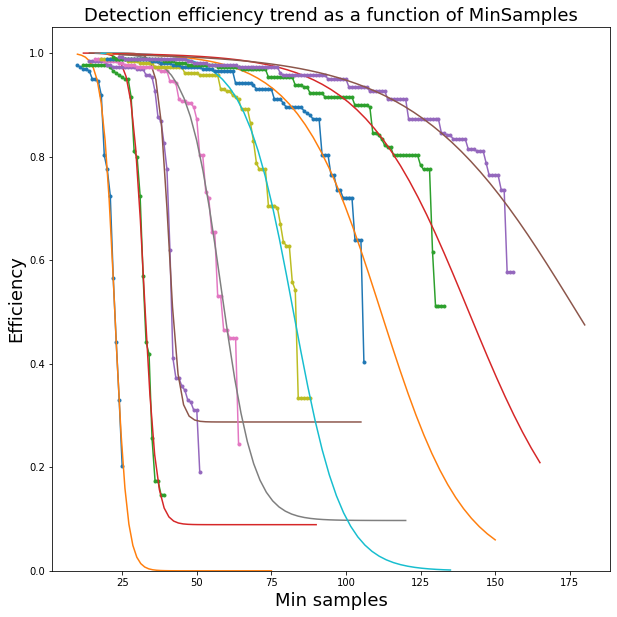

Time elapsed 23.393690 


Run 401
Time elapsed 24.740202 


Run 402
Time elapsed 20.815486 


Run 403
Time elapsed 23.724411 


Run 404
Time elapsed 17.819635 


Run 405
Time elapsed 21.698869 


Run 406
Time elapsed 24.408596 


Run 407
Time elapsed 21.613864 


Run 408
Time elapsed 22.270010 


Run 409
Time elapsed 21.686489 


Run 410
Time elapsed 21.664381 


Run 411
Time elapsed 20.920213 


Run 412
Time elapsed 21.314276 


Run 413
Time elapsed 21.526675 


Run 414
Time elapsed 22.679726 


Run 415
Time elapsed 21.088109 


Run 416
Time elapsed 20.194407 


Run 417
Time elapsed 21.508953 


Run 418
Time elapsed 24.578178 


Run 419
Time elapsed 19.408250 


Run 420
Time elapsed 23.075632 


Run 421
Time elapsed 19.507007 


Run 422
Time elapsed 23.215438 


Run 423
Time elapsed 24.197871 


Run 424
Time elapsed 17.496313 


Run 425
Time elapsed 22.947083 


Run 426
Time elapsed 25.992394 


Run 427
Time elapsed 20.731927 


Run 428
Time elapsed 20.260966 


Run 429
Time elapsed 1

In [3]:
from scipy.optimize import curve_fit
import time
t = time.clock()
scaler = StandardScaler()

hist_purity = []
purity_highest = []

hist_efficiency = []
efficiency_highest =[]

hist_ginocchio = []

list_e = []
list_p = []
list_n = []

ao = 500

def dist1(x,a,b,c,d):
  return 1 - b/(1+np.exp(-c*(x-d))) 

for run in np.arange(0,ao,1):

    t0= time.clock()

    # Importazione dataframe

    print('Run %d' %run)

    df1 = pd.read_csv('grid_%d.csv' %run)
    df2 = pd.read_csv('signal_%d.csv' %run)

    points = pd.DataFrame.to_numpy(df1)
    signal_plot = pd.DataFrame.to_numpy(df2)

    scaler.fit(points)
    points_ = scaler.transform(points)

    min_eps = 0.5
    max_eps = 1.3
    step_eps = 0.1

    purity_highest_temp = []
    detection_efficiency_highest = []

    hist_temp_purity = []
    hist_temp_efficiency = []
    hist_temp_ginocchio = []

    list_temp_e = []
    list_temp_p = []
    list_temp_n = []

    for eps in np.arange(min_eps, max_eps, step_eps):

        min_min_samples = 20*eps
        max_min_samples = 150*eps
        step_min_samples = 1

        purity_max = 0
        detection_efficiency_max = 0
        detection_efficiency_plot = []
        min_samples_range=[]

        for min_samples in np.arange(min_min_samples, max_min_samples, step_min_samples):


            # CLUSTERING

            db = DBSCAN(eps, min_samples).fit(points_)
            core_samples_mask = np.zeros_like(db.labels_,dtype=bool)       # Inizializza un array booleano, della stessa forma di labels_
            core_samples_mask[db.core_sample_indices_] = True              # Considera tutti i core trovati da dbscan
            labels = db.labels_

            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)    # Conta i cluster, togliendo il  rumore (k=-1)
            n_noise_ = list(labels).count(-1)                              # Numero di punti di rumore

            # Plot dei cluster individuati

            unique_labels = set(labels)
            colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]             # Sceglie la palette di   colori senza il nero

            cluster_efficiency = 0
            weight_sum = 0

            clusters_points = (labels==-1)  # Seleziona tutti i punti clusterizzati tranne il rumore
            
            punti = points[~clusters_points]  # Punti clusterizzati da dbscan come segnale
           
            for k, col in zip(unique_labels, colors):                      # Per ogni cluster, associo un colore
            
                class_member_mask = (labels == k)                          # Seleziona tutti i punti del cluster k

                xy_core = points[class_member_mask & core_samples_mask]    # Solo se è nel cluster E è un core point
                xy_border = points[class_member_mask & ~core_samples_mask] # Solo se è nel cluster E non è core  ==  è un edge point del cluster
                
                # Efficienza della clusterizzazione

                phot = 0                                      # Contatore di fotoni
                x = 0
                y = 0

                if k == -1:

                  col = [0, 0, 0, 1]                          # Nero per il rumore

                else:

                  for i in np.arange(0,len(xy_core),1):       # Somme sui pixel contenuti nel cluster k, pesate con il numero di fotoni
                    
                    x += xy_core[i][0] * xy_core[i][2]
                    y += xy_core[i][1] * xy_core[i][2]
                    phot += xy_core[i][2]

                  for i in np.arange(0,len(xy_border),1):
                    
                    x += xy_border[i][0] * xy_border[i][2]
                    y += xy_border[i][1] * xy_border[i][2]
                    phot += xy_border[i][2]

                  x /= phot
                  y /= phot

                  dist = np.sqrt((x-centers[0][0])**2+(y-centers[0][1])**2)
                  clust_eff_partial = ((len(signal_plot) - abs(len(signal_plot)-len(xy_core)-len(xy_border)) )/len(signal_plot))*1/dist

                  if clust_eff_partial < 0:
                    
                    cluster_efficiency += 0

                  else:

                    cluster_efficiency += clust_eff_partial
                  
                  weight_sum += 1/dist

            # Purezza

            if len(punti) > 0:                                # Considero solo le run che trovano segnale

              len_sig=len(signal_plot)
              len_punti=len(punti)

              count_p=0                                       # Conta i pixel trovati da dbscan correttamente
              for i in range (len_sig):
                for j in range (len_punti):
                  if punti[j,0]==signal_plot[i,0] and punti[j,1]==signal_plot[i,1] and punti[j,2]==signal_plot[i,2]:
                    count_p+=1
                
              purity=1-(len(punti)-count_p)/count_p
              detection_efficiency=count_p/len(signal_plot)
              detection_efficiency_plot.append(detection_efficiency)
              min_samples_range.append(min_samples)

              list_temp_e.append(detection_efficiency)
              list_temp_p.append(purity)
              list_temp_n.append(n_clusters_)

              if purity>purity_max:

                purity_max = purity
                purity_min_samples = min_samples

              if detection_efficiency >= detection_efficiency_max:
                
                detection_efficiency_max = detection_efficiency
                detection_efficiency_min_samples = min_samples

            else:
              
              list_temp_e.append(0)
              list_temp_p.append(0)
              list_temp_n.append(n_clusters_)

            # Efficienza di rivelazione 
             
            if n_clusters_ != 0:

              cluster_efficiency /= weight_sum

        hist_temp_purity.append(purity_min_samples)
        purity_highest_temp.append(purity_max)

        hist_temp_efficiency.append(detection_efficiency_min_samples)
        detection_efficiency_highest.append(detection_efficiency_max)

        #print('min samples', min_samples_range)
        #print('eff', detection_efficiency_plot)
        par_x, cov_x= curve_fit(dist1,min_samples_range,detection_efficiency_plot,maxfev=100000, p0=[1, 1, 0.5, 10], bounds=([0,0.2,0,0], [1,1,1,max_min_samples]) )
        hist_temp_ginocchio.append(par_x[3] + np.log((0.95-par_x[0])/(par_x[0]-par_x[1]-0.95))/par_x[2])
        #print('gin', hist_temp_ginocchio)

        if (run%100)==0:
          plt.title('Detection efficiency trend as a function of MinSamples',fontsize=18)
          plt.xlabel('Min samples',fontsize=18)
          plt.ylabel('Efficiency',fontsize=18)
          plt.plot(min_samples_range,detection_efficiency_plot,'.-',label='Eps = %.1lf' %eps)
          x = np.linspace(min_min_samples, max_min_samples)
          y_fit = dist1(x, par_x[0], par_x[1], par_x[2], par_x[3])
          plt.plot(x, y_fit, '-')
          fig = matplotlib.pyplot.gcf()
          fig.set_size_inches(10, 10)
          plt.ylim(0, 1.05)
    plt.show()

    list_e.append(list_temp_e)
    list_p.append(list_temp_p)
    list_n.append(list_temp_n)

    purity_highest.append(purity_highest_temp)
    hist_purity.append(hist_temp_purity)

    efficiency_highest.append(detection_efficiency_highest)
    hist_efficiency.append(hist_temp_efficiency)

    hist_ginocchio.append(hist_temp_ginocchio)
    
    t1 = time.clock() - t0
    print('Time elapsed %lf \n\n' %t1)

t2 = time.clock() - t
print('Total running time %lf' %t2)

**STATISTICA**

In [0]:
hist_dataframe_p = pd.DataFrame(hist_purity)
hist_dataframe_p.to_csv('hist_dataframe_p.csv')
hist_dataframe_p.to_csv('hist_dataframe_p.txt')

hist_dataframe_e = pd.DataFrame(hist_efficiency)
hist_dataframe_e.to_csv('hist_dataframe_e.csv')
hist_dataframe_e.to_csv('hist_dataframe_e.txt')

hist_dataframe_g = pd.DataFrame(hist_ginocchio)
hist_dataframe_g.to_csv('hist_dataframe_g.csv')
hist_dataframe_g.to_csv('hist_dataframe_g.txt')

dataframe_e = pd.DataFrame(list_e)
dataframe_p.to_csv('dataframe_p.csv')
dataframe_p.to_csv('dataframe_p.txt')

dataframe_p = pd.DataFrame(list_p)
dataframe_e.to_csv('dataframe_e.csv')
dataframe_e.to_csv('dataframe_e.txt')

dataframe_n = pd.DataFrame(list_n)
dataframe_n.to_csv('dataframe_n.csv')
dataframe_n.to_csv('dataframe_n.txt')

effmax_dataframe = pd.DataFrame(efficiency_highest)
effmax_dataframe.to_csv('efficiency_dataframe.csv')
effmax_dataframe.to_csv('efficiency_dataframe.txt')

purmax_dataframe = pd.DataFrame(purity_highest)
purmax_dataframe.to_csv('purity_dataframe.csv')
purmax_dataframe.to_csv('purity_dataframe.txt')

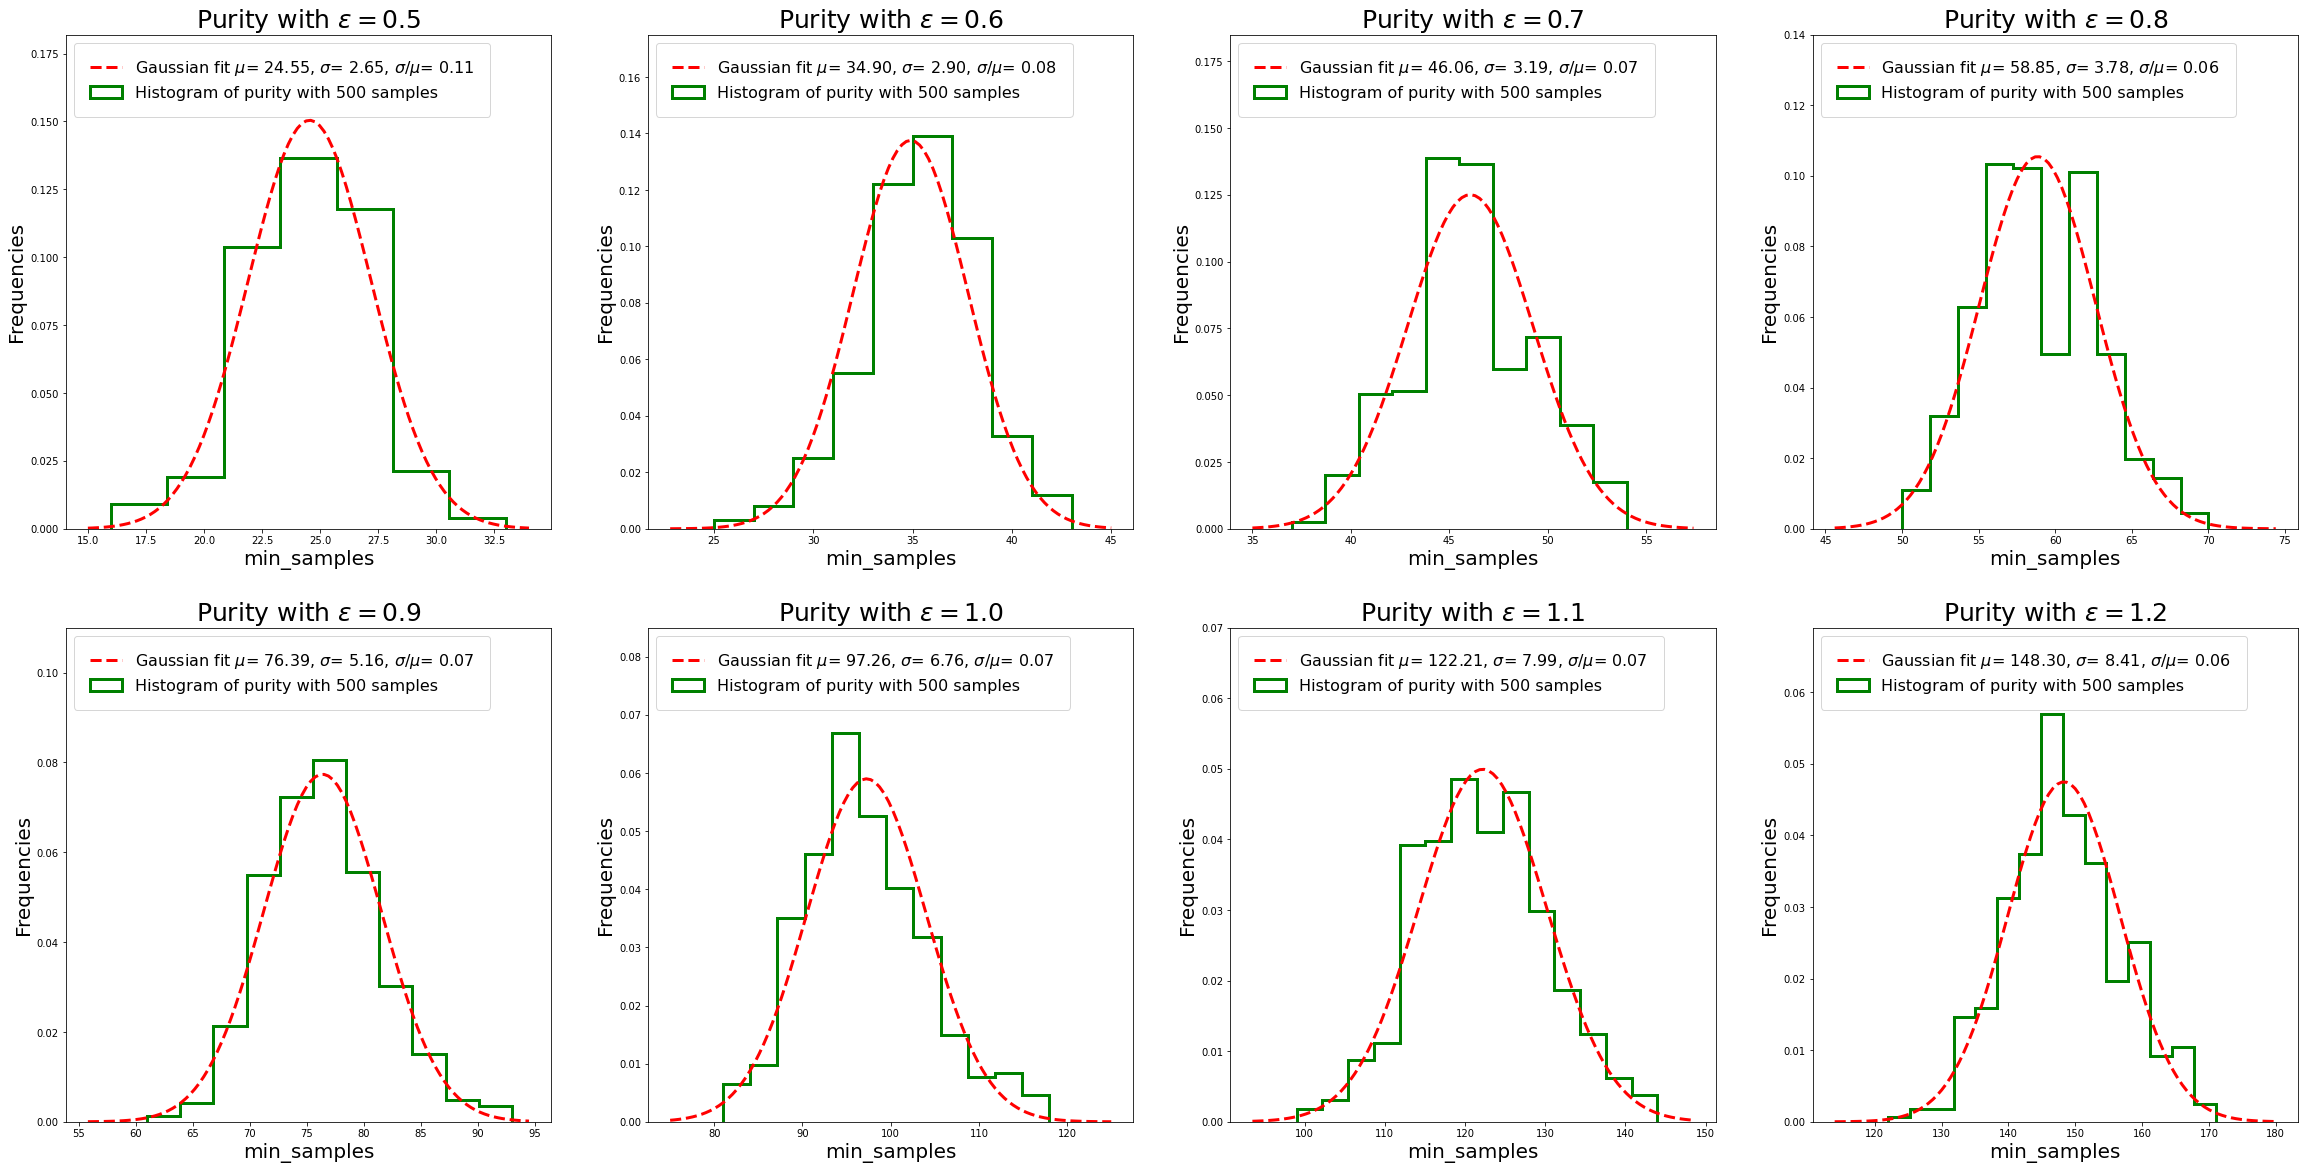

In [47]:
hist_dataframe_p = pd.DataFrame(hist_purity)
hist_dataframe_e = pd.DataFrame(hist_efficiency)
hist_dataframe_g = pd.DataFrame(hist_ginocchio)

#Purity
epsilon = 0.5

for i in range(4):

  plt.subplot(2,4,i+1)
  if i == 0:
    x_gaus = np.linspace(30*epsilon, 68*epsilon, 100)
    plt.ylim(0, 0.182)
  if i == 1:
    x_gaus = np.linspace(38*epsilon, 75*epsilon, 100)
    plt.ylim(0, 0.175)
  if i == 2:
    x_gaus = np.linspace(50*epsilon, 82*epsilon, 100)
    plt.ylim(0, 0.185)
  if i == 3:
    x_gaus = np.linspace(57*epsilon, 93*epsilon, 100)
    plt.ylim(0, 0.14)
  a = hist_dataframe_p[i].to_numpy()
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.ylabel('Frequencies',fontsize=20)
  plt.title('Purity with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=int(15*epsilon), color='green', label='Histogram of purity with 500 samples', density=True,histtype='step',linewidth=3)
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper left', borderpad=1, fontsize=16)

  epsilon+=0.1

for i in range(4):

  plt.subplot(2,4,i+5)
  if i == 0:
    x_gaus = np.linspace(62*epsilon, 105*epsilon, 100)
    plt.ylim(0, 0.11)
  if i == 1:
    x_gaus = np.linspace(75*epsilon, 125*epsilon, 100)
    plt.ylim(0, 0.085)
  if i == 2:
    x_gaus = np.linspace(85*epsilon, 135*epsilon, 100)
    plt.ylim(0, 0.07)
  if i == 3:
    x_gaus = np.linspace(95*epsilon, 150*epsilon, 100)
    plt.ylim(0, 0.069)
  a = hist_dataframe_p[i+4].to_numpy()
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.ylabel('Frequencies',fontsize=20)
  plt.title('Purity with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=int(13*epsilon), color='green', label='Histogram of purity with 500 samples', density=True,histtype='step',linewidth=3)
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'r--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper left', borderpad=1, fontsize=16)
  epsilon+=0.1

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 20)

plt.show()



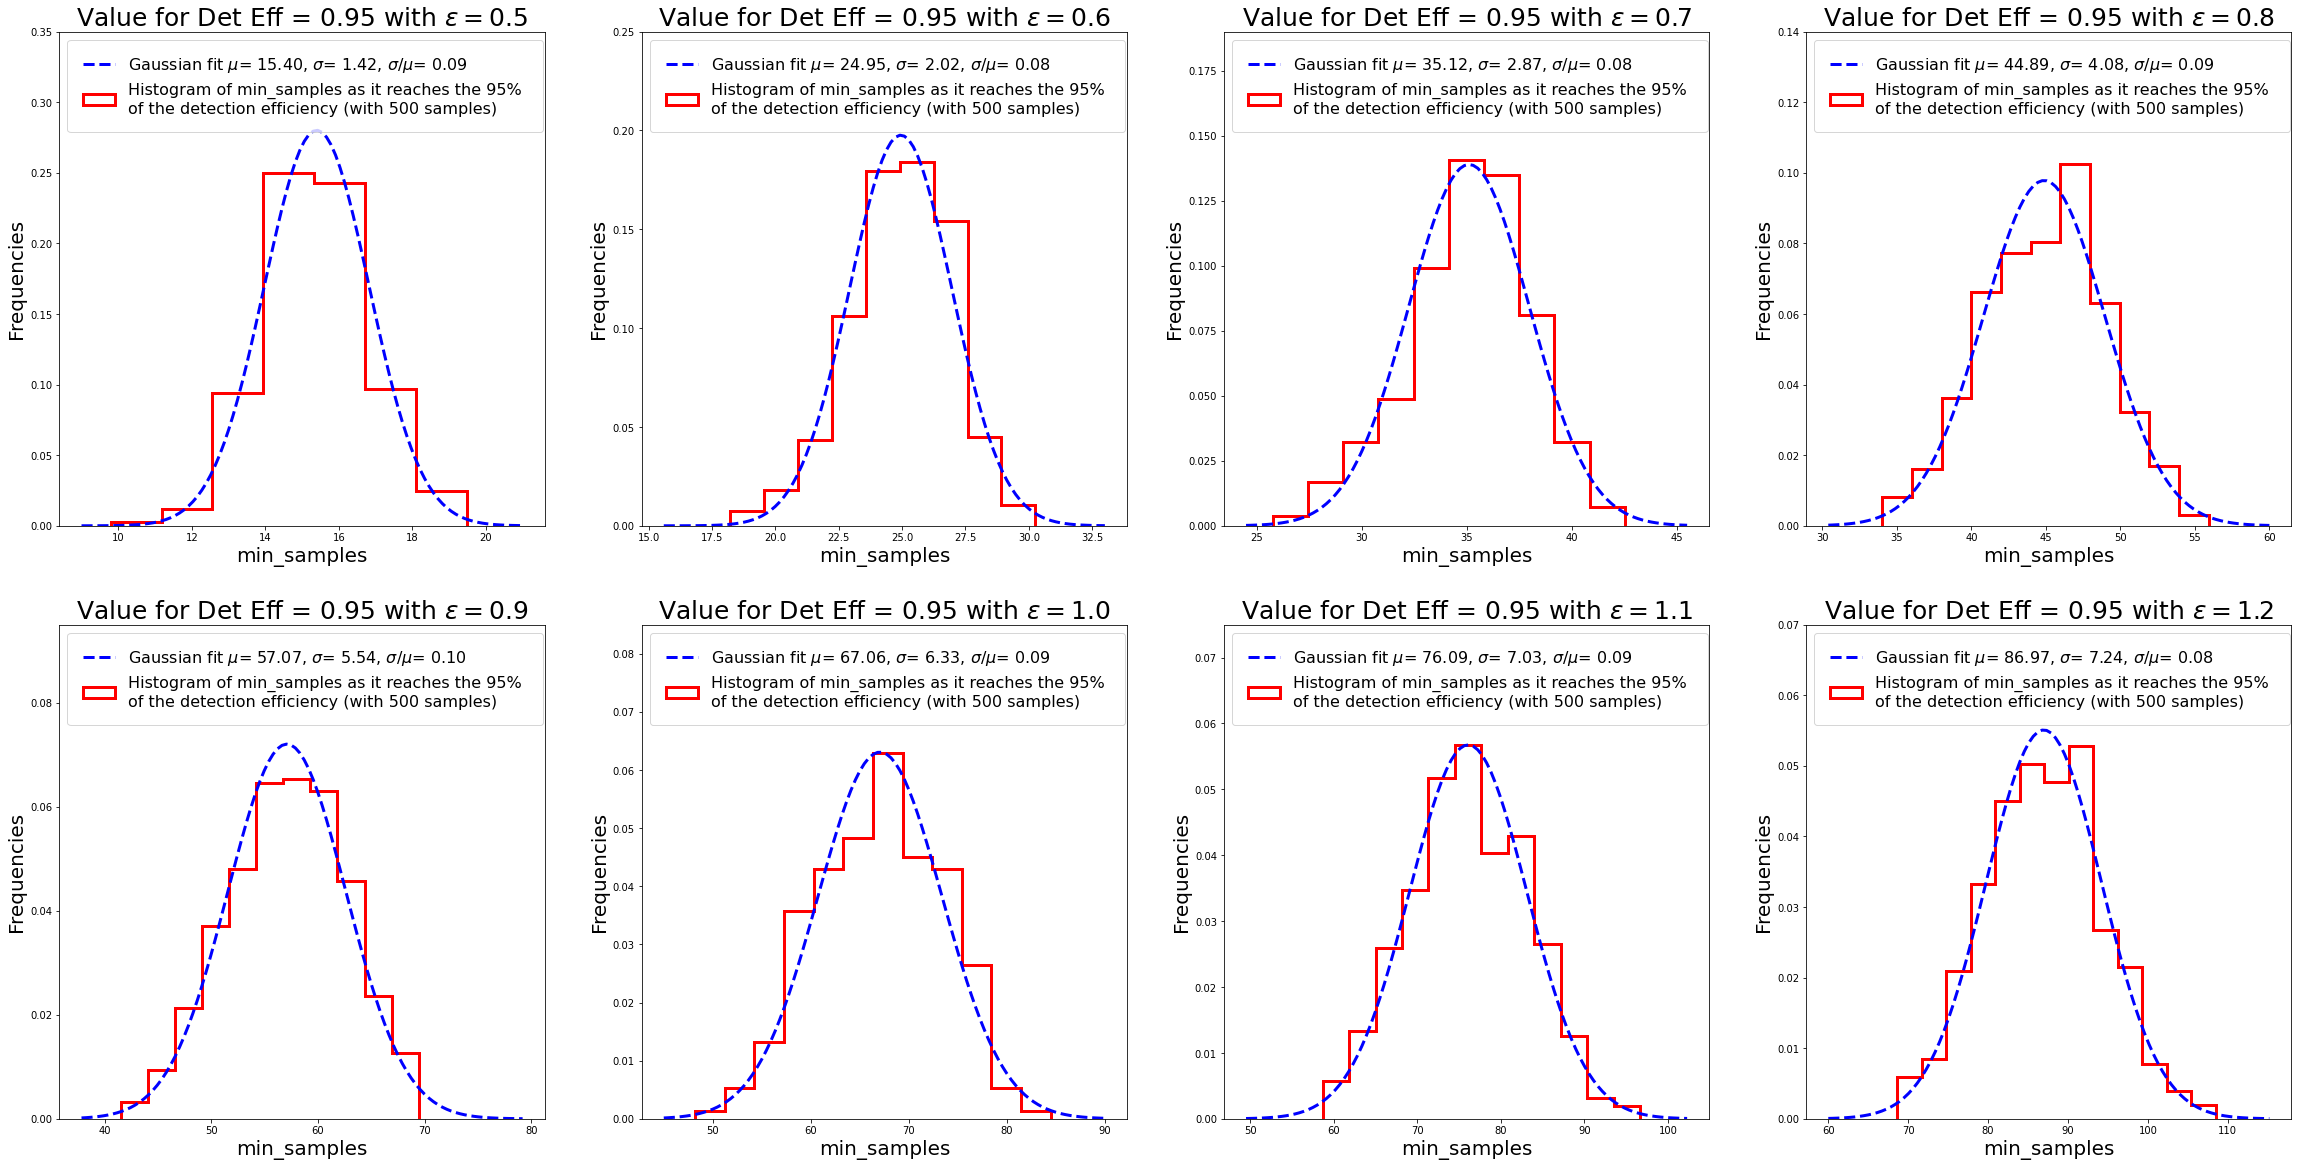

In [42]:
#Ginocchio
epsilon = 0.5

for i in range(4):

  plt.subplot(2,4,i+1)
  if i == 0:
    x_gaus = np.linspace(18*epsilon, 42*epsilon, 100)
    plt.ylim(0, 0.35)
  if i == 1:
    x_gaus = np.linspace(26*epsilon, 55*epsilon, 100)
    plt.ylim(0, 0.25)
  if i == 2:
    x_gaus = np.linspace(35*epsilon, 65*epsilon, 100)
    plt.ylim(0, 0.19)
  if i == 3:
    x_gaus = np.linspace(38*epsilon, 75*epsilon, 100)
    plt.ylim(0, 0.14)
  a = hist_dataframe_g[i].to_numpy()
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.ylabel('Frequencies',fontsize=20)
  plt.title('Value for Det Eff = 0.95 with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=int(15*epsilon), color='red', label='Histogram of min_samples as it reaches the 95% \nof the detection efficiency (with 500 samples)', density=True,histtype='step',linewidth=3)
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'b--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper left', borderpad=1, fontsize=16)
  epsilon+=0.1

for i in range(4):

  plt.subplot(2,4,i+5)
  if i == 0:
    x_gaus = np.linspace(42*epsilon, 88*epsilon, 100)
    plt.ylim(0, 0.095)
    numbin = int(13*epsilon)
  if i == 1:
    x_gaus = np.linspace(45*epsilon, 90*epsilon, 100)
    plt.ylim(0, 0.085)
    numbin = int(13*epsilon)
  if i == 2:
    x_gaus = np.linspace(45*epsilon, 93*epsilon, 100)
    plt.ylim(0, 0.075)
    numbin = int(11*epsilon)
  if i == 3:
    x_gaus = np.linspace(50*epsilon, 96*epsilon, 100)
    plt.ylim(0, 0.07)
    numbin = int(11*epsilon)
  a = hist_dataframe_g[i+4].to_numpy()
  mu, std = norm.fit(a)
  plt.xlabel('min_samples',fontsize=20)
  plt.ylabel('Frequencies',fontsize=20)
  plt.title('Value for Det Eff = 0.95 with $\epsilon = %.1f$' %epsilon,fontsize=25)
  plt.hist(a, bins=numbin, color='red', label='Histogram of min_samples as it reaches the 95% \nof the detection efficiency (with 500 samples)', density=True,histtype='step',linewidth=3)
  plt.plot(x_gaus, np.exp(-0.5*((x_gaus-mu)/std)**2) /(std*np.sqrt(2*np.pi)), 'b--', linewidth=3, label='Gaussian fit $\mu$= %.2lf, $\sigma$= %.2lf, $\sigma/\mu$= %.2lf'%(mu, std, std/mu))
  plt.legend( loc='upper left', borderpad=1, fontsize=16)
  epsilon+=0.1

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 20)

plt.show()

# GRAFICO PURITY VS DETECTION EFFICIENCY VS $N_{cluster}$

In [52]:
import statistics as st

dataframe_e = pd.DataFrame(list_e)
dataframe_p = pd.DataFrame(list_p)
dataframe_n = pd.DataFrame(list_n)

min_eps = 0.5
max_eps = 1.3
step_eps = 0.1

n_eps = int((max_eps-min_eps)/step_eps)
eps = 0.5
min_k = 0

mean_e = []
mean_p = []
mean_n = []

std_e = []
std_p = []

for i in np.arange(0,n_eps,1):

  for k in np.arange(min_k,int(130*eps)+min_k,1):

    a = dataframe_e['%d' %k].to_numpy()
    b = dataframe_p['%d' %k].to_numpy()
    c = dataframe_n['%d' %k].to_numpy()
    
    mean_e.append(st.mean(a))
    mean_p.append(st.mean(b))
    mean_n.append(st.mean(c))

    std_e.append(st.stdev(a))
    std_p.append(st.stdev(b))
  
  min_k = int(130*eps)
  eps+=0.1

fig = plt.figure(figsize=(12,12))
fig = matplotlib.pyplot.gcf()
plt.scatter(mean_e,mean_p,c=mean_n,cmap='jet',s=100)
plt.xlim(0.80,1)
plt.ylim(0.80,1)
ax = plt.colorbar()
ax.set_label('$N_{Cluster}$',fontsize=18)
#plt.errorbar(mean_e,mean_p,std_p,std_e,markersize=0,fmt='.')
plt.title('Purity vs Detection efficiency and $N_{Cluster}$',fontsize=18)
plt.xlabel('Detection efficiency',fontsize=18)
plt.ylabel('Purity',fontsize=18)
#plt.colorbar()
fig.set_size_inches(10, 10)
plt.show()

KeyError: ignored

In [0]:
import statistics as st

purity_dataframe = pd.DataFrame(purity_highest)
efficiency_dataframe = pd.DataFrame(efficiency_highest)

purity_mean = []
purity_std = []

efficiency_mean = []
efficiency_std = []

for i in range(8):

  a = purity_dataframe[i].to_numpy()
  b = efficiency_dataframe[i].to_numpy()

  mean_p = st.mean(a)
  mean_e = st.mean(b)

  std_p = st.stdev(a)
  std_e = st.stdev(b)

  purity_mean.append(mean_p)
  purity_std.append(std_p)

  efficiency_mean.append(mean_e)
  efficiency_std.append(std_e)

print(purity_mean)
print(purity_std)
print(efficiency_mean)
print(efficiency_std)